<a href="https://colab.research.google.com/github/Ritikatholia123/plant-disease-detection/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import numpy as np
import pandas  as pd
df= pd.read_csv('/content/heart_disease_dataset.csv')

In [5]:
#Data Overview
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [6]:

#Size of the dataset
df.shape

(1000, 16)

In [7]:
#data types of each column
df.dtypes

,0
Age,int64
Gender,object
Cholesterol,int64
Blood Pressure,int64
Heart Rate,int64
Smoking,object
Alcohol Intake,object
Exercise Hours,int64
Family History,object
Diabetes,object


In [8]:
#Finding missing values
df.isnull().sum()

,0
Age,0
Gender,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Smoking,0
Alcohol Intake,340
Exercise Hours,0
Family History,0
Diabetes,0


In [9]:

#Finding missing values
df.isnull().sum()

,0
Age,0
Gender,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Smoking,0
Alcohol Intake,340
Exercise Hours,0
Family History,0
Diabetes,0


Class Distribution: Heart Disease
0    608
1    392
Name: count, dtype: int64


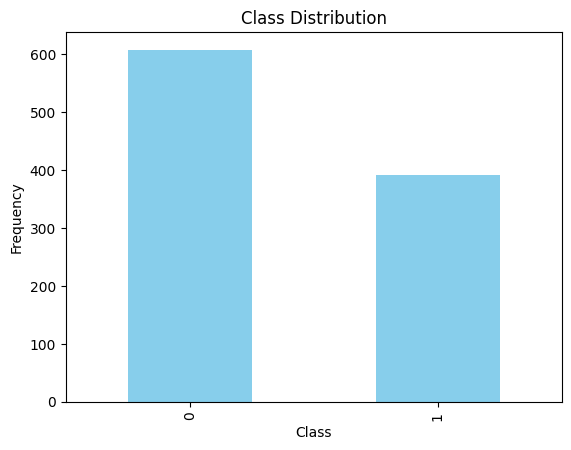

In [10]:
#Class Distribution
import matplotlib.pyplot as plt
class_distribution=df['Heart Disease'].value_counts()
print("Class Distribution:",class_distribution)
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Percentage of heart disease:39.20%


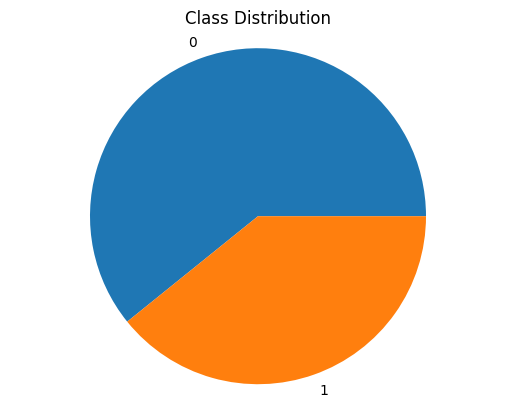

In [11]:
#percentage of heart disease in dataset
total_trans=len(df)
fraudulent_trans=df['Heart Disease'].sum()
fraud_percent=(fraudulent_trans/total_trans)*100
print(f"Percentage of heart disease:{fraud_percent:.2f}%")
plt.pie(class_distribution, labels=class_distribution.index)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

In [12]:
#Data Preprocessing
df['Gender'] = pd.factorize(df['Gender'])[0]

In [13]:
df=df.drop(['Smoking','Alcohol Intake',],axis=1)

In [14]:
df['Family History'] = pd.factorize(df['Family History'])[0]
df['Diabetes'] = pd.factorize(df['Diabetes'])[0]
df['Obesity'] = pd.factorize(df['Obesity'])[0]
df['Exercise Induced Angina'] = pd.factorize(df['Exercise Induced Angina'])[0]

In [15]:
df['Chest Pain Type'] = pd.factorize(df['Chest Pain Type'])[0]

In [16]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,0,228,119,66,1,0,0,0,8,119,0,0,1
1,48,1,204,165,62,5,0,0,1,9,70,0,1,0
2,53,1,234,91,67,3,1,0,0,5,196,0,0,1
3,69,0,192,90,72,4,0,1,1,7,107,0,2,0
4,62,0,172,163,93,6,0,1,1,2,183,0,3,0


In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                              Age    Gender  Cholesterol  Blood Pressure  \
Age                      1.000000  0.014044    -0.010673        0.002093   
Gender                   0.014044  1.000000    -0.012566       -0.023785   
Cholesterol             -0.010673 -0.012566     1.000000        0.021841   
Blood Pressure           0.002093 -0.023785     0.021841        1.000000   
Heart Rate               0.029027  0.014741    -0.008527       -0.001675   
Exercise Hours          -0.021366 -0.024491     0.016124        0.011924   
Family History           0.017532  0.099990    -0.007862       -0.015410   
Diabetes                -0.011193 -0.039943    -0.028409       -0.065437   
Obesity                  0.011096  0.056013    -0.002814        0.037476   
Stress Level            -0.045555  0.029643     0.090458        0.002257   
Blood Sugar             -0.041676  0.069209     0.002484       -0.053516   
Exercise Induced Angina  0.022848 -0.005673    -0.037989       -0.005496   
Chest Pain T

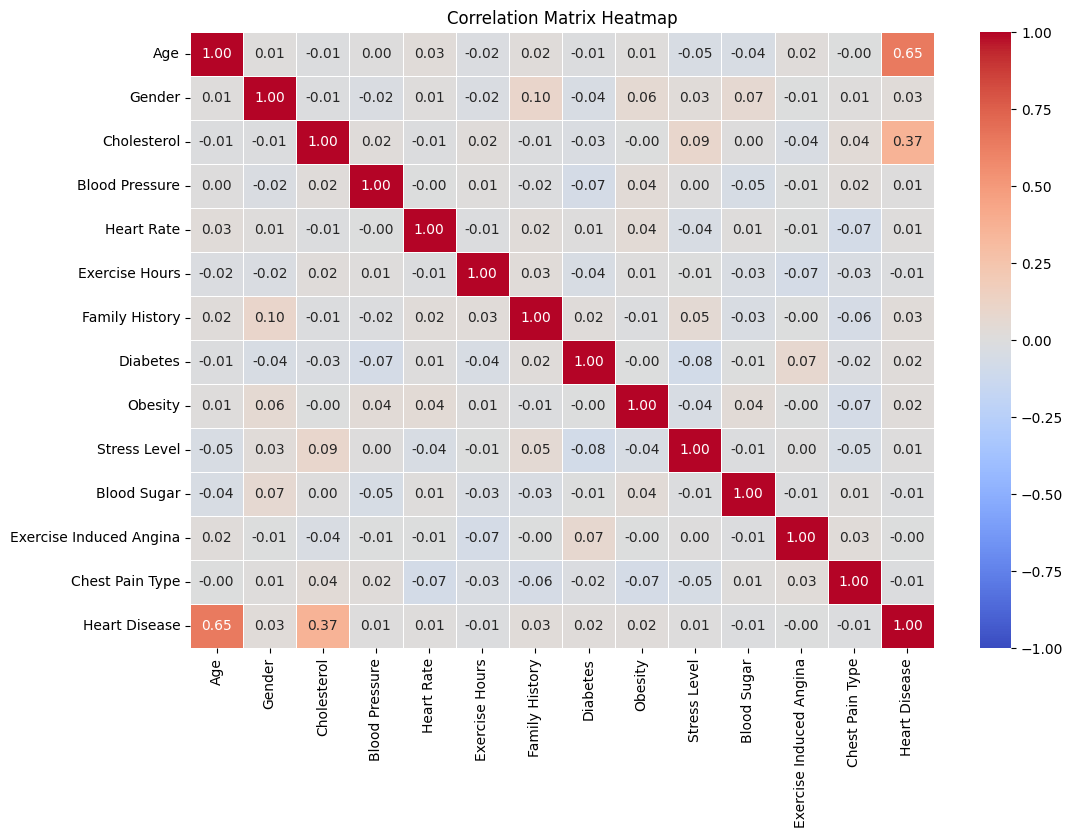

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)

# Add title and labels
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [19]:
#Visualization
print(df['Heart Disease'].value_counts())

Heart Disease
0    608
1    392
Name: count, dtype: int64


/tmp/ipython-input-3270987069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart Disease', data=df, palette='coolwarm')


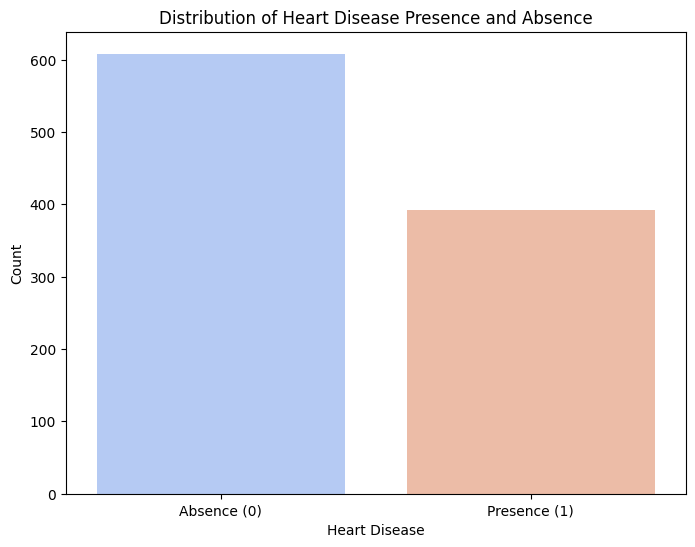

In [20]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a count plot
sns.countplot(x='Heart Disease', data=df, palette='coolwarm')

# Add title and labels
plt.title('Distribution of Heart Disease Presence and Absence')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Add labels for better understanding
plt.xticks(ticks=[0, 1], labels=['Absence (0)', 'Presence (1)'])

# Show the plot
plt.show()

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
model_save_path = '/content/drive/MyDrive/model.h5'